In [1]:
# !pip install pandas_datareader
# !pip install pmdarima
# !pip install statsmodels

In [2]:
import os
import pandas as pd
import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

import seaborn as sns
import itertools

In [3]:
data = pd.read_excel("카카오2020~.xlsx")
data = data.sort_values(by=['일자'])
data

C:\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
573,2020/01/02,152500.0,-1000.0,-0.65,154000.0,154500.0,152000.0,241047.0,3.688588e+10,1.314759e+13,86213726.0
572,2020/01/03,152500.0,0.0,0.00,153500.0,155000.0,151000.0,314848.0,4.809908e+10,1.314759e+13,86213726.0
571,2020/01/06,154500.0,2000.0,1.31,150500.0,155000.0,150000.0,393715.0,6.024431e+10,1.332002e+13,86213726.0
570,2020/01/07,160000.0,5500.0,3.56,155000.0,160000.0,154500.0,840186.0,1.330860e+11,1.379420e+13,86213726.0
569,2020/01/08,159500.0,-500.0,-0.31,158500.0,162000.0,156500.0,851619.0,1.356013e+11,1.375109e+13,86213726.0
...,...,...,...,...,...,...,...,...,...,...,...
4,2022/04/21,93600.0,-1500.0,-1.58,95100.0,95100.0,93100.0,1809576.0,1.693084e+11,4.177091e+13,446270406.0
3,2022/04/22,92000.0,-1600.0,-1.71,92200.0,92400.0,91400.0,1553904.0,1.425437e+11,4.105688e+13,446270406.0
2,2022/04/25,89700.0,-2300.0,-2.50,90400.0,91600.0,89600.0,1511408.0,1.363678e+11,4.003046e+13,446270406.0
1,2022/04/26,90200.0,500.0,0.56,89800.0,91700.0,89700.0,1368258.0,1.239580e+11,4.025359e+13,446270406.0


In [4]:
data.iloc[315:318]

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
258,2021/04/12,558000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.952912e+13,88761861.0
257,2021/04/13,558000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.952912e+13,88761861.0
256,2021/04/14,558000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.952912e+13,88761861.0


In [5]:
data_ = data[(data.거래량==0)].index
data1 = data.drop(data_)
a = data1.loc[:256]
b = data1.loc[255:]
c = b['종가']*5
b['종가'] = c
data2 = pd.concat([a,b],ignore_index = True)
data2

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19380\369606100.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['종가'] = c


,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2020/01/02,152500.0,-1000.0,-0.65,154000.0,154500.0,152000.0,241047.0,3.688588e+10,1.314759e+13,86213726.0
1,2020/01/03,152500.0,0.0,0.00,153500.0,155000.0,151000.0,314848.0,4.809908e+10,1.314759e+13,86213726.0
2,2020/01/06,154500.0,2000.0,1.31,150500.0,155000.0,150000.0,393715.0,6.024431e+10,1.332002e+13,86213726.0
3,2020/01/07,160000.0,5500.0,3.56,155000.0,160000.0,154500.0,840186.0,1.330860e+11,1.379420e+13,86213726.0
4,2020/01/08,159500.0,-500.0,-0.31,158500.0,162000.0,156500.0,851619.0,1.356013e+11,1.375109e+13,86213726.0
...,...,...,...,...,...,...,...,...,...,...,...
566,2022/04/21,468000.0,-1500.0,-1.58,95100.0,95100.0,93100.0,1809576.0,1.693084e+11,4.177091e+13,446270406.0
567,2022/04/22,460000.0,-1600.0,-1.71,92200.0,92400.0,91400.0,1553904.0,1.425437e+11,4.105688e+13,446270406.0
568,2022/04/25,448500.0,-2300.0,-2.50,90400.0,91600.0,89600.0,1511408.0,1.363678e+11,4.003046e+13,446270406.0
569,2022/04/26,451000.0,500.0,0.56,89800.0,91700.0,89700.0,1368258.0,1.239580e+11,4.025359e+13,446270406.0


In [6]:
data2.iloc[310:330]

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
310,2021/04/05,502000.0,1000.0,0.20,503000.0,505000.0,500000.0,310400.0,1.560488e+11,4.455085e+13,88746712.0
311,2021/04/06,544000.0,42000.0,8.37,506000.0,545000.0,505000.0,1724958.0,9.182750e+11,4.827821e+13,88746712.0
312,2021/04/07,542000.0,-2000.0,-0.37,544000.0,544000.0,526000.0,820896.0,4.400318e+11,4.810072e+13,88746712.0
313,2021/04/08,548000.0,6000.0,1.11,539000.0,561000.0,534000.0,912514.0,5.007614e+11,4.863320e+13,88746712.0
314,2021/04/09,558000.0,10000.0,1.82,554000.0,561000.0,551000.0,788839.0,4.382750e+11,4.952912e+13,88761861.0
315,2021/04/15,602500.0,8500.0,7.59,120500.0,132500.0,118000.0,17115015.0,2.099372e+12,5.347902e+13,443809305.0
316,2021/04/16,595000.0,-1500.0,-1.24,115500.0,120500.0,115500.0,13709555.0,1.603810e+12,5.281331e+13,443809305.0
317,2021/04/19,595000.0,0.0,0.00,120000.0,122000.0,117500.0,5441693.0,6.529615e+11,5.281331e+13,443809305.0
318,2021/04/20,597500.0,500.0,0.42,119000.0,121000.0,118000.0,2952174.0,3.531545e+11,5.303521e+13,443809305.0
319,2021/04/21,590000.0,-1500.0,-1.26,119500.0,119500.0,117000.0,4461636.0,5.250285e+11,5.236950e+13,443809305.0


In [7]:
data2['일자'] = pd.to_datetime(data2['일자'])
data2.index = data2['일자']
data2.set_index('일자', inplace = True)
data2

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
일자,,,,,,,,,,
2020-01-02,152500.0,-1000.0,-0.65,154000.0,154500.0,152000.0,241047.0,3.688588e+10,1.314759e+13,86213726.0
2020-01-03,152500.0,0.0,0.00,153500.0,155000.0,151000.0,314848.0,4.809908e+10,1.314759e+13,86213726.0
2020-01-06,154500.0,2000.0,1.31,150500.0,155000.0,150000.0,393715.0,6.024431e+10,1.332002e+13,86213726.0
2020-01-07,160000.0,5500.0,3.56,155000.0,160000.0,154500.0,840186.0,1.330860e+11,1.379420e+13,86213726.0
2020-01-08,159500.0,-500.0,-0.31,158500.0,162000.0,156500.0,851619.0,1.356013e+11,1.375109e+13,86213726.0
...,...,...,...,...,...,...,...,...,...,...
2022-04-21,468000.0,-1500.0,-1.58,95100.0,95100.0,93100.0,1809576.0,1.693084e+11,4.177091e+13,446270406.0
2022-04-22,460000.0,-1600.0,-1.71,92200.0,92400.0,91400.0,1553904.0,1.425437e+11,4.105688e+13,446270406.0
2022-04-25,448500.0,-2300.0,-2.50,90400.0,91600.0,89600.0,1511408.0,1.363678e+11,4.003046e+13,446270406.0


In [8]:
from matplotlib import font_manager, rc
font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.style.use('ggplot')

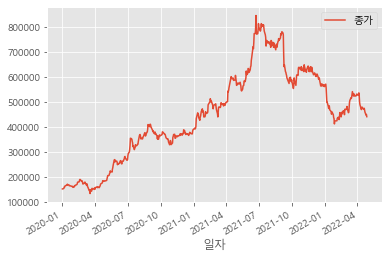

In [9]:
close_data = data2[['종가']]
fig = close_data.plot()

In [10]:
from sklearn.model_selection import train_test_split
close_data_train, close_data_test = train_test_split(close_data, test_size = 0.05, shuffle = False)

C:\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


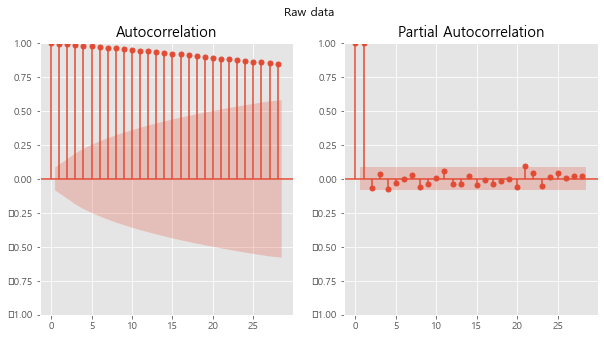

In [11]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Raw data')
sm.graphics.tsa.plot_acf(close_data_train.values.squeeze(), ax=ax[0])
sm.graphics.tsa.plot_pacf(close_data_train.values.squeeze(), ax=ax[1]);

In [12]:
diff_close_data_train = close_data_train.copy()
diff_close_data_train = diff_close_data_train['종가'].diff()
diff_close_data_train = diff_close_data_train.dropna()
print('Raw data')
print(close_data_train)
print('Differenced data')
print(diff_close_data_train)

Raw data
                  종가
일자                  
2020-01-02  152500.0
2020-01-03  152500.0
2020-01-06  154500.0
2020-01-07  160000.0
2020-01-08  159500.0
...              ...
2022-03-11  507500.0
2022-03-14  517500.0
2022-03-15  515000.0
2022-03-16  520000.0
2022-03-17  532500.0

[542 rows x 1 columns]
Differenced data
일자
2020-01-03        0.0
2020-01-06     2000.0
2020-01-07     5500.0
2020-01-08     -500.0
2020-01-09     4500.0
               ...   
2022-03-11     7500.0
2022-03-14    10000.0
2022-03-15    -2500.0
2022-03-16     5000.0
2022-03-17    12500.0
Name: 종가, Length: 541, dtype: float64


C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


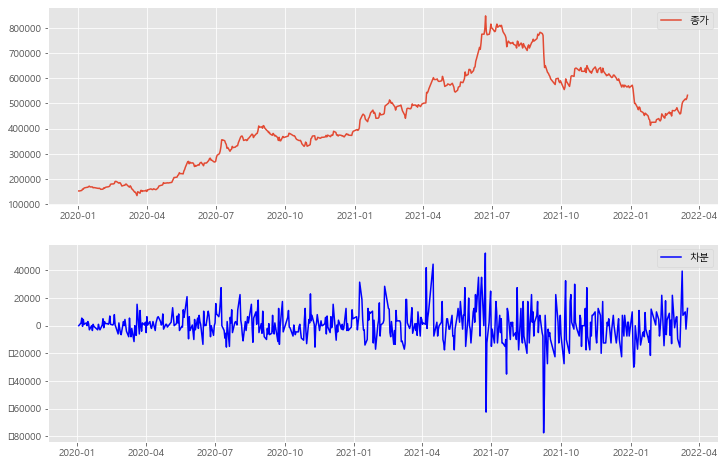

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(close_data_train['종가'])
plt.legend(['종가'])
plt.subplot(212)
plt.plot(diff_close_data_train,'blue')
plt.legend(['차분'])
plt.show()

C:\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


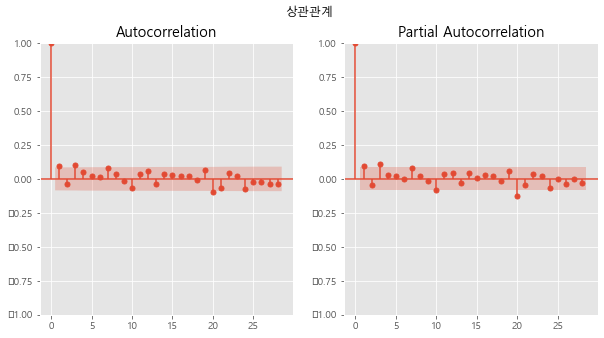

In [14]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('상관관계')
sm.graphics.tsa.plot_acf(diff_close_data_train.values.squeeze(), ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_close_data_train.values.squeeze(), ax=ax[1]);

In [15]:
auto_arima_model = auto_arima(close_data_train, start_p = 1, start_q = 1,
                             max_p = 5, max_q = 5, seasonal = False,
                             d = 1,
                             trace = True,
                             error_action = 'ignore',
                             suppress_warnings = True,
                             stepwise = False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11674.145, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11672.229, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11673.105, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11670.145, Time=0.10 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=11671.881, Time=0.12 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=11673.609, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11672.509, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11670.761, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11672.818, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11671.521, Time=0.41 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=11673.585, Time=0.44 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11673.727, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11672.835, Time=0.36 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11673.300, Time=0.62 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11673.239, Time=0.50

In [16]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  542
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -5829.891
Date:                Mon, 02 May 2022   AIC                          11669.781
Time:                        10:28:44   BIC                          11691.249
Sample:                             0   HQIC                         11678.176
                                - 542                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    585.0756    500.793      1.168      0.243    -396.461    1566.612
ar.L1          0.0801      0.024      3.387      0.001       0.034       0.126
ar.L2         -0.0435      0.040     -1.081      0.280      -0.122       0.035
ar.L3          0.0915      0.034      2.702      0.007       0.025       0.158
sigma2      1.342e+08      0.010   1.38e+10      0.000    1.34e+08    1.34e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):              1044.93
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               5.01   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.06e+25. Standard errors may be unstable.
"""

C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


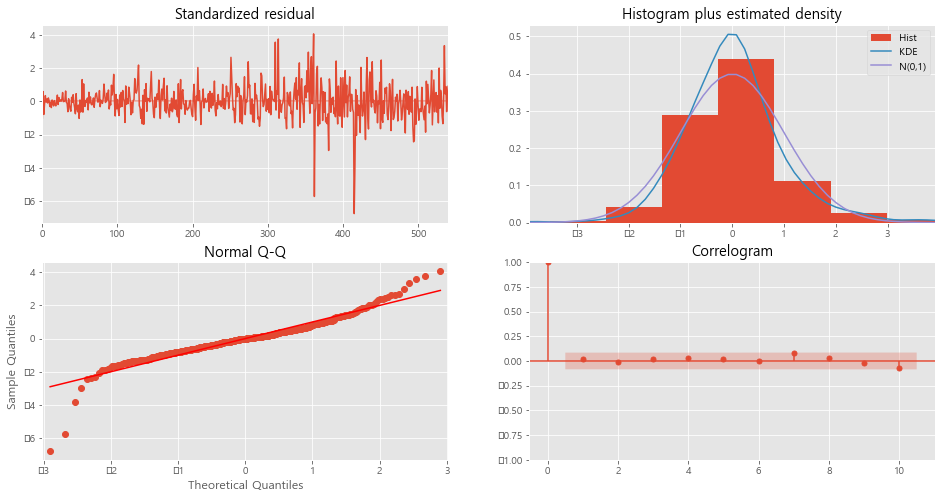

In [42]:
auto_arima_model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [17]:
prediction = auto_arima_model.predict(len(close_data_test), return_conf_int = True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(close_data_test.index)
predict_index[0]

Timestamp('2022-03-18 00:00:00')

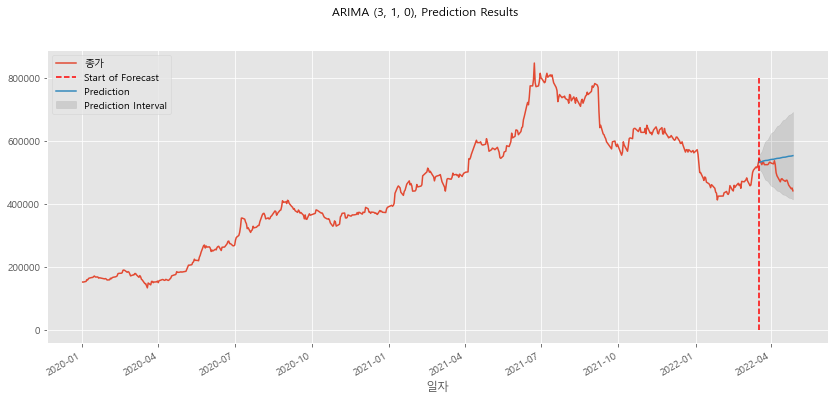

In [18]:
fig, ax = plt.subplots(figsize = (14,6))
close_data.plot(ax=ax);
ax.vlines('2022-03-18',0, 800000, linestyle = '--', color = 'r', label = 'Start of Forecast');
ax.plot(predict_index, predicted_value, label = 'Prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label = 'Prediction Interval')
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA {auto_arima_model.order}, Prediction Results')
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(close_data_test, predicted_value))
rms

57956.069551210196

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import numpy as np

rms = sqrt(mean_squared_error(close_data_test, predicted_value))
rms


mse = mean_squared_error(close_data_test, predicted_value)
rmse = np.sqrt(mse) # 사이킷런이 지원하지 않기 때문에 np.sqrt() 사용해서 계산

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(close_data_test, predicted_value)))

MSE : 3358905997.825 , RMSE : 57956.070
Variance score : -2.369


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
MAE = mean_absolute_error(close_data_test, predicted_value)
RMSE = np.sqrt(mean_squared_error(close_data_test, predicted_value))
MSLE = mean_squared_log_error(close_data_test, predicted_value)
RMSLE = np.sqrt(mean_squared_log_error(close_data_test, predicted_value))
R2 = r2_score(close_data_test, predicted_value)
mse = mean_squared_error(close_data_test, predicted_value)

pd.options.display.float_format = '{:.5f}'.format
Result = pd.DataFrame(data = [mse, MAE, RMSE, RMSLE, R2],
                     index = ['mse','MAE', 'RMSE', 'RMSLE', 'R2'],
                     columns = ['Results'])
Result


,Results
mse,3358905997.82471
MAE,45257.36888
RMSE,57956.06955
RMSLE,0.11446
R2,-2.36896
